# 1. Introduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from features import Polynomial
from regressions import LinearRegression, RidgeRegression, BayesianLinearRegression

## 1.1. Example: Polynomial Curve Fitting

### Training Data
$$t = \sin(2\pi x) + \epsilon$$
$$\epsilon\sim\mathcal{N}(\epsilon|0, \sigma^2)$$

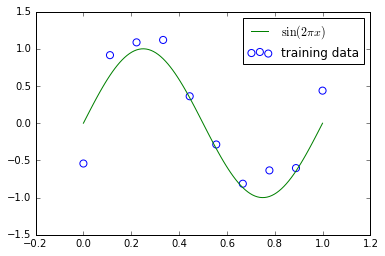

In [2]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

### Polynomial function
$$y(x, {\bf w}) = w_0 + w_1 x + \cdots + w_Mx^M = \sum_{j=0}^M w_jx^j$$
### Error function
$$E({\bf w}) = {1\over2}\sum_{n=1}^N\left\{y(x_n,{\bf w}) - t_n\right\}^2$$

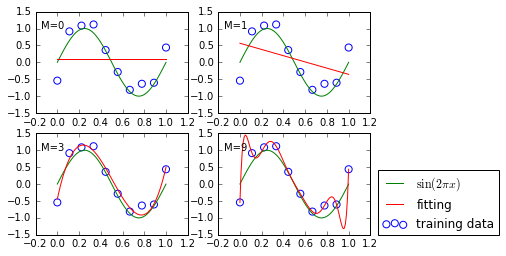

In [3]:
for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)
    feature = Polynomial(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

### Root Mean Square Errors
$$E_{RMS} = \sqrt{{2E({\bf w})\over N}}$$

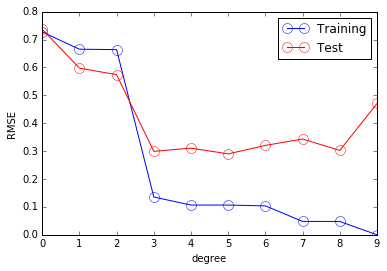

In [4]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = Polynomial(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

## Regularization

Cost function with penalty
$$\tilde{E}({\bf w}) = {1\over2}\sum_{n=1}^N\left\{y(x_n,{\bf w}) - t_n\right\}^2 + {\alpha\over2}\|{\bf w}\|^2$$

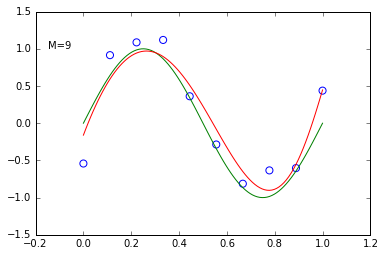

In [5]:
feature = Polynomial(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

y = model.predict(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="fitting")
plt.ylim(-1.5, 1.5)
plt.annotate("M=9", xy=(-0.15, 1))
plt.show()

## 1.2.6 Bayesian curve fitting
### posterior distribution
$$\begin{align}
p({\bf w}|{\bf x}, {\bf t}, \alpha, \beta) &\propto p({\bf t}|{\bf x}, {\bf w}, \beta)p({\bf w}|{\bf\alpha})\\
&= \prod_{n=1}^N\mathcal{N}(t_n|y(x_n,{\bf w}),\beta^{-1})\mathcal{N}({\bf w}|{\bf 0}, \alpha^{-1}{\bf I})
\end{align}$$
### predictive distribution
$$\begin{align}
p(t|x,{\bf x},{\bf t},\alpha,\beta) = \int p(t|x,{\bf w},\beta)p({\bf w}|{\bf x}, {\bf t}, \alpha, \beta){\rm d}{\bf w}
\end{align}$$

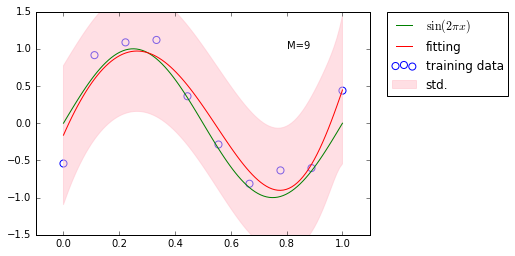

In [6]:
bayes_model = BayesianLinearRegression(alpha=2e-3, beta=2)
bayes_model.fit(X_train, y_train)

y, y_err = bayes_model.predict_dist(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="fitting")
plt.fill_between(x_test, y - y_err, y + y_err, color="pink", label="std.", alpha=0.5)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.5, 1.5)
plt.annotate("M=9", xy=(0.8, 1))
plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)
plt.show()

## 1.3 Model Selection
### Akaike information criterion
$$\ln p(\mathcal{D}|{\bf w}_{ML}) - M$$
The code below does not work as I expected

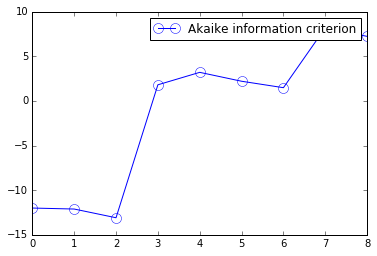

In [8]:
aic = []
for i in range(9):
    feature = Polynomial(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    aic.append(model.aic(X_train, y_train))
plt.plot(aic, 'o-', mfc="none", mec="b", ms=10, c="b", label="Akaike information criterion")
plt.legend()
plt.show()